In [1]:
# importar las bibliotecas necesarias
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
# Cargar el archivo CSV
df = pd.read_csv("files/dist.data")
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,y
0,15.310142,NaN,8.436759,3.723421,Dec,NaN,1.319733,21.408846
1,11.841750,1.558534,-4.776643,4.304625,Dec,MB,7.129585,0.273072
2,4.343978,NaN,NaN,4.540588,NaN,MM,NaN,19.010811
3,NaN,2.428672,9.003936,4.456992,NaN,MA,NaN,13.564040
4,14.892188,NaN,8.468824,1.070600,NaN,B,3.369261,25.493163
...,...,...,...,...,...,...,...,...
523,10.844312,NaN,1.653327,4.249280,Dec,MM,NaN,7.833448
524,12.346405,NaN,1.041838,3.406081,Dec,MB,NaN,10.452970
525,1.496831,3.115300,9.288658,4.547431,App,MM,NaN,9.310863
526,NaN,NaN,12.267643,2.867885,App,MA,-1.471284,27.283751


Del df inferimos:
Numéricas: x_1, x_2, x_3, x_4, x_7
Categóricas: x_5, x_6

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     484 non-null    float64
 1   x_2     265 non-null    float64
 2   x_3     464 non-null    float64
 3   x_4     507 non-null    float64
 4   x_5     377 non-null    object 
 5   x_6     358 non-null    object 
 6   x_7     155 non-null    float64
 7   y       518 non-null    float64
dtypes: float64(6), object(2)
memory usage: 33.1+ KB


Si los datos faltantes superan el 60% de los datos por columna, elimine esa columna.

In [4]:
df.isna().sum()/len(df) * 100

x_1     8.333333
x_2    49.810606
x_3    12.121212
x_4     3.977273
x_5    28.598485
x_6    32.196970
x_7    70.643939
y       1.893939
dtype: float64

Se elimina la columna x_7 según el criterio establecido

In [5]:
df_clean_1 = df.drop(['x_7'], axis=1)
df_clean_1

,x_1,x_2,x_3,x_4,x_5,x_6,y
0,15.310142,NaN,8.436759,3.723421,Dec,NaN,21.408846
1,11.841750,1.558534,-4.776643,4.304625,Dec,MB,0.273072
2,4.343978,NaN,NaN,4.540588,NaN,MM,19.010811
3,NaN,2.428672,9.003936,4.456992,NaN,MA,13.564040
4,14.892188,NaN,8.468824,1.070600,NaN,B,25.493163
...,...,...,...,...,...,...,...
523,10.844312,NaN,1.653327,4.249280,Dec,MM,7.833448
524,12.346405,NaN,1.041838,3.406081,Dec,MB,10.452970
525,1.496831,3.115300,9.288658,4.547431,App,MM,9.310863
526,NaN,NaN,12.267643,2.867885,App,MA,27.283751


Sustituya el resto de los datos faltantes:
- Si la variable es categórica sustituya por la moda.
- Si la variable presenta distribución uniforme, sustituya de forma aleatoria (considere como distribución uniforme curtosis menor a -1.2).
- Si la variable presenta una distribución diferente a la uniforme:
-- Sustituya por la media aritmética si presenta un sesgo positivo.
-- Sustituya por la mediana si presenta un sesgo negativo.

array([[<AxesSubplot: title={'center': 'x_1'}>,
        <AxesSubplot: title={'center': 'x_2'}>],
       [<AxesSubplot: title={'center': 'x_3'}>,
        <AxesSubplot: title={'center': 'x_4'}>],
       [<AxesSubplot: title={'center': 'y'}>, <AxesSubplot: >]],
      dtype=object)

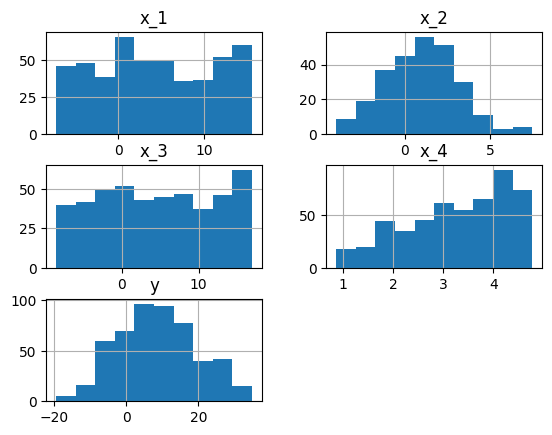

In [6]:
df_clean_1.hist()

In [7]:
# - Si la variable presenta distribución uniforme, sustituya de forma aleatoria (considere como distribución uniforme curtosis menor a -1.2).
# Revisamos si la kurtosis es menor que -1.2 para decidir qué variables tienen distribuión uniforme (A parte del método gráfico)
df_clean_1.kurt() < -1.2

C:\Users\anhernan\AppData\Local\Temp\ipykernel_11480\1612660917.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean_1.kurt() < -1.2


x_1     True
x_2    False
x_3     True
x_4    False
y      False
dtype: bool

In [8]:
# - Si la variable presenta una distribución diferente a la uniforme:
# -- Sustituya por la media aritmética si presenta un sesgo positivo.
# -- Sustituya por la mediana si presenta un sesgo negativo.
# Con la función skew podemos checar si el sesgo es postivo o negativo
df_clean_1.skew()

C:\Users\anhernan\AppData\Local\Temp\ipykernel_11480\794827671.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean_1.skew()


x_1    0.045977
x_2    0.196266
x_3    0.012478
x_4   -0.478714
y      0.130844
dtype: float64

## Sustitución de valores faltantes

In [ ]:
# Del df inferimos:
# Numéricas: x_1, x_2, x_3, x_4, x_7
# Categóricas: x_5, x_6
# X_1 Dist Uniforme. Sustituir aleatoria
df_no_nan = df.copy()
df_no_nan.dropna(inplace=True)
df_no_nan.reset_index(drop=True, inplace=True)
random_index = np.random.randint(df_no_nan.shape[0],size=df.x3.isna().sum())
df_clean_1.x3.loc[np.where(df.x3.isna())] = df_no_nan.x3.loc[random_index].values
df_clean_1.x3.isna().sum()


# X_2 Sesgo positivo. Media Aritmética
# x_3 Dist Uniforme. Sustituir aleatoria
# X_4 Sesgo negativo. Sustituir por mediana.
# x_5 categorica. Sustituir por moda
# x_6 categorica. Sustituir por moda
# y Sesgo positivo. Media Aritmética